## Image guessing game
### [Jack Roberson]
### [11-19-2019]

OBJECTIVE:
* Create a program that will take an existing high resolution image file and convert it to an image of the same size but lower resolution of your choice. The program then saves the low-res image files with a name according to their resolution. The images can then be used to play a game: Show the lowest resolution image and ask others to guess what it is. If the resolution is low enough, then no one will be able to recognize it. Gradually show images of increasing resolution until someone guesses correctly. So fun!
* Creating this program will require you to use many array properties and operations: shape, indexing, slicing, and average.
* You will also learn some string formatting for printing and saving files; and you will learn how matplotlib interprets arrays as images.

1. Import matplotlib.pyplot as plt and numpy as np

In [1]:
import matplotlib.pyplot as plt
import numpy as np

2. Define a variable that is equal to a string that is the file name for your hi res photo. Use 'hi_res' somewhere in the name of the file. This photo needs to be in the same folder as your jupyter notebook. Then define a variable and set it equal to the array that you create from that file by using the function `plt.imread(...)`. 
    * Test the ability of jupyter and plt to show you your image by using the function `plt.imshow(...)`. After you have tested `plt.imshow(...)`, throw it away for now. 
    * Also test the ability of jupyter to show you the array numerically. This is what an image is to a computer! I was amazed when I first learned this.

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 19,   1,   1],
        [ 19,   1,   1],
        [ 19,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 19,   1,   1],
        [ 19,   1,   1],
        [ 19,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 19,   1,   1],
        [ 19,   1,   1],
        [ 19,   1,   1]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [174, 129, 106],
        [150, 108,  84],
        [ 89,  47,  25]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [174, 129, 108],
        [154, 112,  90],
        [ 95,  54,  34]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [113,  70,  51],
        [ 97,  56,  36],
        [ 39,   1,   0]]

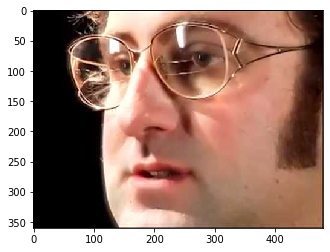

In [27]:
tim_hi_res = "TIMERIC AWESOME.jpg"
TIM = plt.imread(tim_hi_res)
plt.imshow(TIM)
TIM

3. Print a statement that will tell the user what the size of the hi-res photo is. To do this, use the `.shape` attribute of your array. What type of data is `.shape`? What do you do if you want only one component of it at a time? What does each component mean? You should be able to explain the meaning of each component. Use those components of data (don't hard-code it!) as parts of your print statement.

In [3]:
Image = str(object = "TIMERIC AWESOME.jpg")
plt.imread(Image).shape

(360, 480, 3)

4. Now you are going to tile the hi-res image with square tiles, each of which is multiple pixels across. Define a variable to represent how wide you want to make each tile. Print a statement that tells the user how big each tile will be, in terms of pixels. This time, use the `.format()` method for strings to put the data into the string.

In [4]:
tile_x = 40
tile_y = 40

print("{0} pixels".format(1600)) #1600 pixels

1600 pixels


5. Now you want to make a smaller array that has one entry per tile. This will be your workspace where you average the colors from all of the pixels in a single tile into a single RGB triplet to color that tile. Start by making an array of zeros using `np.zeros` of the appropriate dimensions. How many tiles wide do you want it to be? How many tiles tall? How many colors 'deep'? Then print a statement that tells the user how many tiles will be in the low-res photo. Again, use data from `.shape` and do not hard-code it.

In [68]:
x = int(TIM.shape[1]/tile_x)
y = int(TIM.shape[0]/tile_y)
z = int(TIM.shape[2])
name = np.zeros([y,x,z],dtype='uint8')

print(x,y,z)
name.shape

12 9 3


(9, 12, 3)

6. We need to do the averaging of the RGB values from all of the pixels in each tile now. Build a couple of nested `for` loops that span across the tiles. Inside those loops, tell each tile what color you want it to be by getting the appropriate RGB values from the original image. (How do you talk to each tile?) What dimensions do you want to average over? What range in these dimensions do you want to average over? What dimensions do you want to NOT average over? You will need to consult the documentation for `np.average()`.

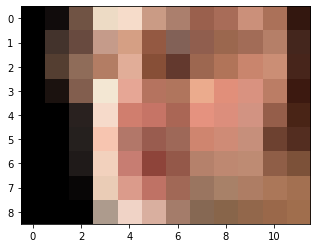

In [70]:
for a in range(0,y):
    for b in range(0,x):
        for c in range(0,3):
            name[a,b,c] = np.average(TIM[a*tile_y:(a+1)*tile_y,b*tile_x:(b+1)*tile_x,c])
plt.imshow(name)

7. Now we need to take our smaller array that had only as many elements as there were tiles. We want to expand that array into a new array that has the same number of pixels as the original hi-res array (so that it will appear the same size), but we want the RGB values in this new array to come from the smaller 'tiles' array. First, make an array of zeros that is the same size and shape as the original hi-res array. Build a couple of `for` loops that will cycle through all of these new pixels and tell them how to get their RGB values from the tiles where you found the average color of each tile.

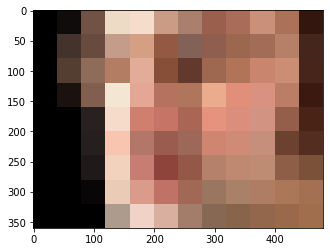

In [75]:
red = np.zeros(np.shape(TIM),dtype = 'uint8')
for a in range(0,y):
    for b in range(0,x):
        for c in range(0,3):
            red[(a*tile_y):((a+1)*tile_y),(b*tile_x):((b+1)*tile_x),c] = name[a,b,c]
            
plt.imshow(red)

8. You are ready to show your low-res image now. Use `plt.imshow()`. You may need to consult the method `.astype()`. Do you want the number 1 to count as full color, or the number 255? If 1 counts as full color, but all of your numbers are significantly greater than 1 because they are somewhere between 0 and 255, your image will just appear maxed out and white. So, inspect your array to see what the scale for your color values is.

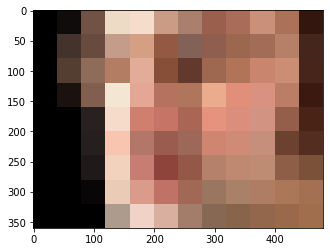

In [82]:
plt.imshow(red)

9. Use the string `.replace()` method to take your input file name and change it 'automatically' to a new file name, changing 'hi_res' to 'low_res_[tile edge size]'. Then use `plt.savefig()` to automate saving the new file in the same folder.

In [85]:
tim_hi_res.replace("","#{0}low res",1)
plt.imsave("#{}TIMERIC AWESOME.jpg",red)

10. Bonus! 
    * +10%: make a 'negative' version of your hi_res photo, using basic array operations. If you find and use a pre-fab negative-maker function, that does not count.
    * +10%: automate the making of several low-res images by embedding the appropriate parts into a super-ordinate `for` loop that cycles through various tile sizes and saves all of the files with appropriate names according to the tile size.

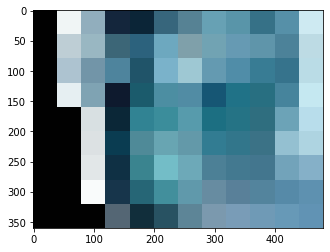

In [88]:
neg = np.zeros(np.shape(TIM),dtype = 'uint8')
for a in range(0,360):
    for b in range(0,480):
        for c in range(0,3):
            neg[a,b,c] = 1 - red[a,b,c]
            
plt.imshow(neg)

11. AS USUAL (!), don't forget to include a 100-150 reflection on your work: what did you learn, how did you figure it out, what was difficult, what are you proud of...

I made progress in displaying and reducing the image resolution, but couldnt figure out how to include the colored version. I chose an image with good properties and defined my variables well, but I cant intergrate the color into the for loops for the low res image. I need to improve my syntax knowledge. I am submitting this version, but will continue to work out the bugs in this program. 

This program involved a lot of trial and error. The first nested for loop segment took a while because I did not know how to average the pixels in each tile separately and also keeping the slicing syntax correct. I had initial trouble with calling the first tile variables for the low resolution image for loop. The program was reading the y axis first then x axis and RGB colors. Another huge breakthrough was figuring out that the image data type had to explicitly be defined with each new low-res image. At the end of the variable name, "dtype = 'uint8'" had to be specified or else the image would not be processed. Creating the 14 new low-res images was not very difficult compared to the rest of the program. Basically, listing the factors of each pixel amount and running a giant for loop with all previously specified variables anf functions.